# Aliasing

In Fourier analysis, aliasing is an effect that causes different signals to become indistinguishable (or aliases of one another) when sampled. It also refers to the distortion or artifact that results when the signal reconstructed from samples is different from the original continuous signal.

Aliasing can occur in signals sampled in time, for instance digital audio, and is referred to as temporal aliasing. Aliasing can also occur in spatially sampled signals, for instance moiré patterns in digital images. Aliasing in spatially sampled signals is called spatial aliasing.

Max t =  0.01
Nyquist Frequency =  5000.0


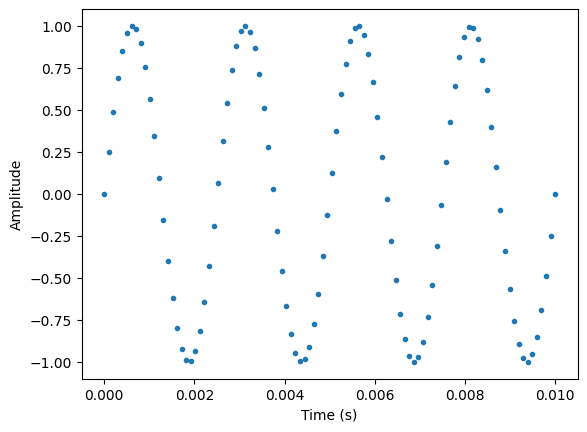

In [48]:
# Aliasing example

import numpy as np
import matplotlib.pyplot as plt

# Create a signal with a sampling rate of 10 kHz
# and a signal frequency of 300 Hz

sampling_rate = 10000 # Hz
signal_freq = 0.04*sampling_rate # Hz

npts = 100
dt = 1/sampling_rate # s

t = np.linspace(0, npts*dt, npts)

print("Max t = ", t[-1])

f_nyquist = sampling_rate/2 # Hz
print("Nyquist Frequency = ",f_nyquist)

# Create a signal
signal = np.sin(2*np.pi*signal_freq*t)

# Plot the signal
plt.plot(t, signal, '.')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [49]:
# Let's use a complex Fourier series to approximate the signal

period = t[-1]
print("Period = ", period)

nterms = int(2.0*period*f_nyquist)
#nterms = int(1.0*period*f_nyquist)

print("Number of terms = ", nterms)

def cn(n):
    global signal, t
    c = signal * np.exp(-1j * 2 * np.pi * n * t / period)
    return c.sum() / len(t)

def f(t, Nh):
    global signal
    f = np.array([2 * cn(i) * np.exp(1j * 2 * np.pi * i * t / period) for i in range(1, Nh + 1)])
    return f.sum()

yf = np.array([f(tt, nterms) for tt in t])


Period =  0.01
Number of terms =  100


(0.0, 0.01)

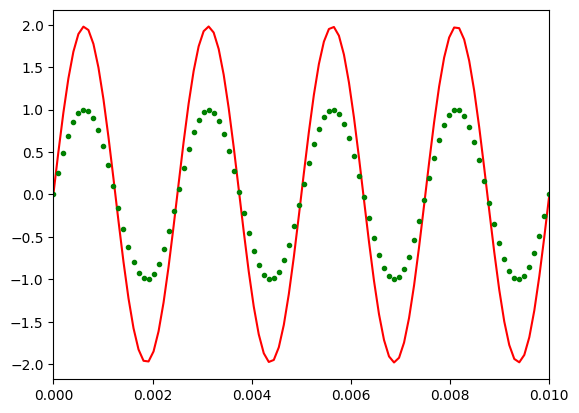

In [50]:
plt.plot(t, yf.real, 'r')
plt.plot(t, signal, 'g.')
plt.xlim([0, 0.01])

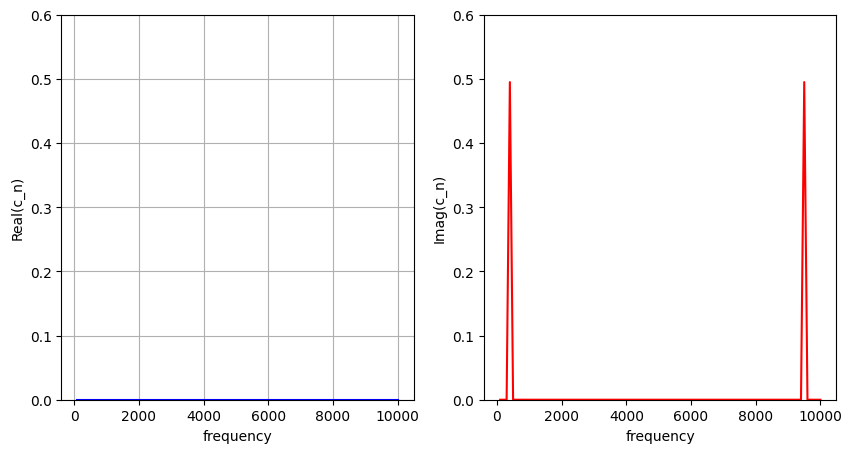

In [51]:
# Plot the Fourier coefficients

n = np.arange(1, nterms+1)
freq = n/period
c = np.array([cn(i) for i in n])

fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].plot(freq, abs(c.real), 'b')
ax[1].plot(freq, abs(c.imag), 'r')
ax[0].set_xlabel('frequency')
ax[0].set_ylabel('Real(c_n)')
ax[1].set_xlabel('frequency')
ax[1].set_ylabel('Imag(c_n)')
ax[0].set_ylim(0, 0.6)
ax[1].set_ylim(0, 0.6)
ax[0].grid()

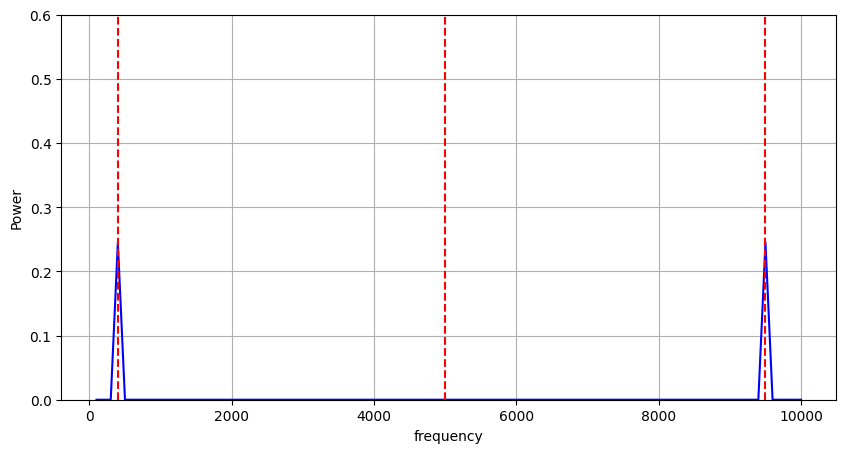

In [54]:
# Plot the power spectrum

fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.plot(freq, abs(c)**2, 'b')
ax.set_xlabel('frequency')
ax.set_ylabel('Power')
ax.set_ylim(0, 0.6)
ax.grid()

# plot vertical lines at the signal frequency, the Nyquist frequency, and the aliased frequency

ax.axvline(signal_freq, color='r', linestyle='--')
ax.axvline(f_nyquist, color='r', linestyle='--')
ax.axvline(0.95*2*f_nyquist, color='r', linestyle='--')


In [45]:
print(freq)

[  100.   200.   300.   400.   500.   600.   700.   800.   900.  1000.
  1100.  1200.  1300.  1400.  1500.  1600.  1700.  1800.  1900.  2000.
  2100.  2200.  2300.  2400.  2500.  2600.  2700.  2800.  2900.  3000.
  3100.  3200.  3300.  3400.  3500.  3600.  3700.  3800.  3900.  4000.
  4100.  4200.  4300.  4400.  4500.  4600.  4700.  4800.  4900.  5000.
  5100.  5200.  5300.  5400.  5500.  5600.  5700.  5800.  5900.  6000.
  6100.  6200.  6300.  6400.  6500.  6600.  6700.  6800.  6900.  7000.
  7100.  7200.  7300.  7400.  7500.  7600.  7700.  7800.  7900.  8000.
  8100.  8200.  8300.  8400.  8500.  8600.  8700.  8800.  8900.  9000.
  9100.  9200.  9300.  9400.  9500.  9600.  9700.  9800.  9900. 10000.]


400.0
10300.0


(0.0, 0.001)

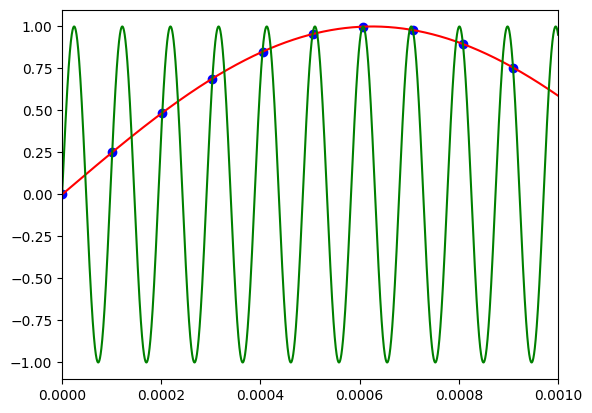

In [60]:
f_primary = 0.04*sampling_rate
print(f_primary)
f_alias = 1.03*2*f_nyquist
print(f_alias)

t_theory = np.linspace(0, period, 100000)

# plot the original signal
plt.plot(t, signal, 'bo')

# plot the primary signal
plt.plot(t_theory, np.sin(2.0*np.pi*f_primary*t_theory), 'r')

# plot the alias signal
plt.plot(t_theory, np.sin(2.0*np.pi*f_alias*t_theory), 'g')

plt.xlim([0, 0.001])